In [1]:
import os
import glob as glob
import matplotlib.pyplot as plt
import cv2
import requests
import random
import numpy as np

np.random.seed(42)

In [47]:
TRAIN = True
# Number of epochs to train for.
EPOCHS = 30  #40

In [48]:
%cd C:\Users\Vinay Kumar Talreja/Desktop/FYP YOLO/

C:\Users\Vinay Kumar Talreja\Desktop\FYP YOLO


In [5]:
# if not os.path.exists('train'):
#     dirs = ['train', 'valid', 'test']

#     for i, dir_name in enumerate(dirs):
#         all_image_names = sorted(os.listdir(f"{dir_name}/images/"))
#         for j, image_name in enumerate(all_image_names):
#             if (j % 2) == 0:
#                 file_name = image_name.split('.jpg')[0]
#                 os.remove(f"{dir_name}/images/{image_name}")
#                 os.remove(f"{dir_name}/labels/{file_name}.txt")

In [8]:
# def download_file(url, save_name):
#     url = url
#     if not os.path.exists(save_name):
#         file = requests.get(url)
#         open(save_name, 'wb').write(file.content)
#     else: 
#         print('File already present, skipping download...')

# Visualization

In [49]:
class_names = ['billete', 'knife', 'monedero', 'pistol', 'smartphone', 'tarjeta']
colors = np.random.uniform(0, 255, size=(len(class_names), 3))

In [50]:
# Function to convert bounding boxes in YOLO format to xmin, ymin, xmax, ymax.
def yolo2bbox(bboxes):
    xmin, ymin = bboxes[0]-bboxes[2]/2, bboxes[1]-bboxes[3]/2
    xmax, ymax = bboxes[0]+bboxes[2]/2, bboxes[1]+bboxes[3]/2
    return xmin, ymin, xmax, ymax

In [51]:
def plot_box(image, bboxes, labels):
    # Need the image height and width to denormalize
    # the bounding box coordinates
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
        x1, y1, x2, y2 = yolo2bbox(box)
        # denormalize the coordinates
        xmin = int(x1*w)
        ymin = int(y1*h)
        xmax = int(x2*w)
        ymax = int(y2*h)
        width = xmax - xmin
        height = ymax - ymin
        
        class_name = class_names[int(labels[box_num])]
        
        cv2.rectangle(
            image, 
            (xmin, ymin), (xmax, ymax),
            color=colors[class_names.index(class_name)],
            thickness=2
        ) 

        font_scale = min(1,max(3,int(w/500)))
        font_thickness = min(2, max(10,int(w/50)))
        
        p1, p2 = (int(xmin), int(ymin)), (int(xmax), int(ymax))
        # Text width and height
        tw, th = cv2.getTextSize(
            class_name, 
            0, fontScale=font_scale, thickness=font_thickness
        )[0]
        p2 = p1[0] + tw, p1[1] + -th - 10
        cv2.rectangle(
            image, 
            p1, p2,
            color=colors[class_names.index(class_name)],
            thickness=-1,
        )
        cv2.putText(
            image, 
            class_name,
            (xmin+1, ymin-10),
            cv2.FONT_HERSHEY_SIMPLEX,
            font_scale,
            (255, 255, 255),
            font_thickness
        )
    return image

In [52]:
# Function to plot images with the bounding boxes.
def plot(image_paths, label_paths, num_samples):
    all_training_images = glob.glob(image_paths)
    all_training_labels = glob.glob(label_paths)
    all_training_images.sort()
    all_training_labels.sort()
    
    num_images = len(all_training_images)
    
    plt.figure(figsize=(15, 12))
    for i in range(num_samples):
        j = random.randint(0,num_images-1)
        image = cv2.imread(all_training_images[j])
        with open(all_training_labels[j], 'r') as f:
            bboxes = []
            labels = []
            label_lines = f.readlines()
            for label_line in label_lines:
                label = label_line[0]
                bbox_string = label_line[2:]
                x_c, y_c, w, h = bbox_string.split(' ')
                x_c = float(x_c)
                y_c = float(y_c)
                w = float(w)
                h = float(h)
                bboxes.append([x_c, y_c, w, h])
                labels.append(label)
        result_image = plot_box(image, bboxes, labels)
        plt.subplot(2, 2, i+1)
        plt.imshow(result_image[:, :, ::-1])
        plt.axis('off')
    plt.subplots_adjust(wspace=0)
    plt.tight_layout()
    plt.show()

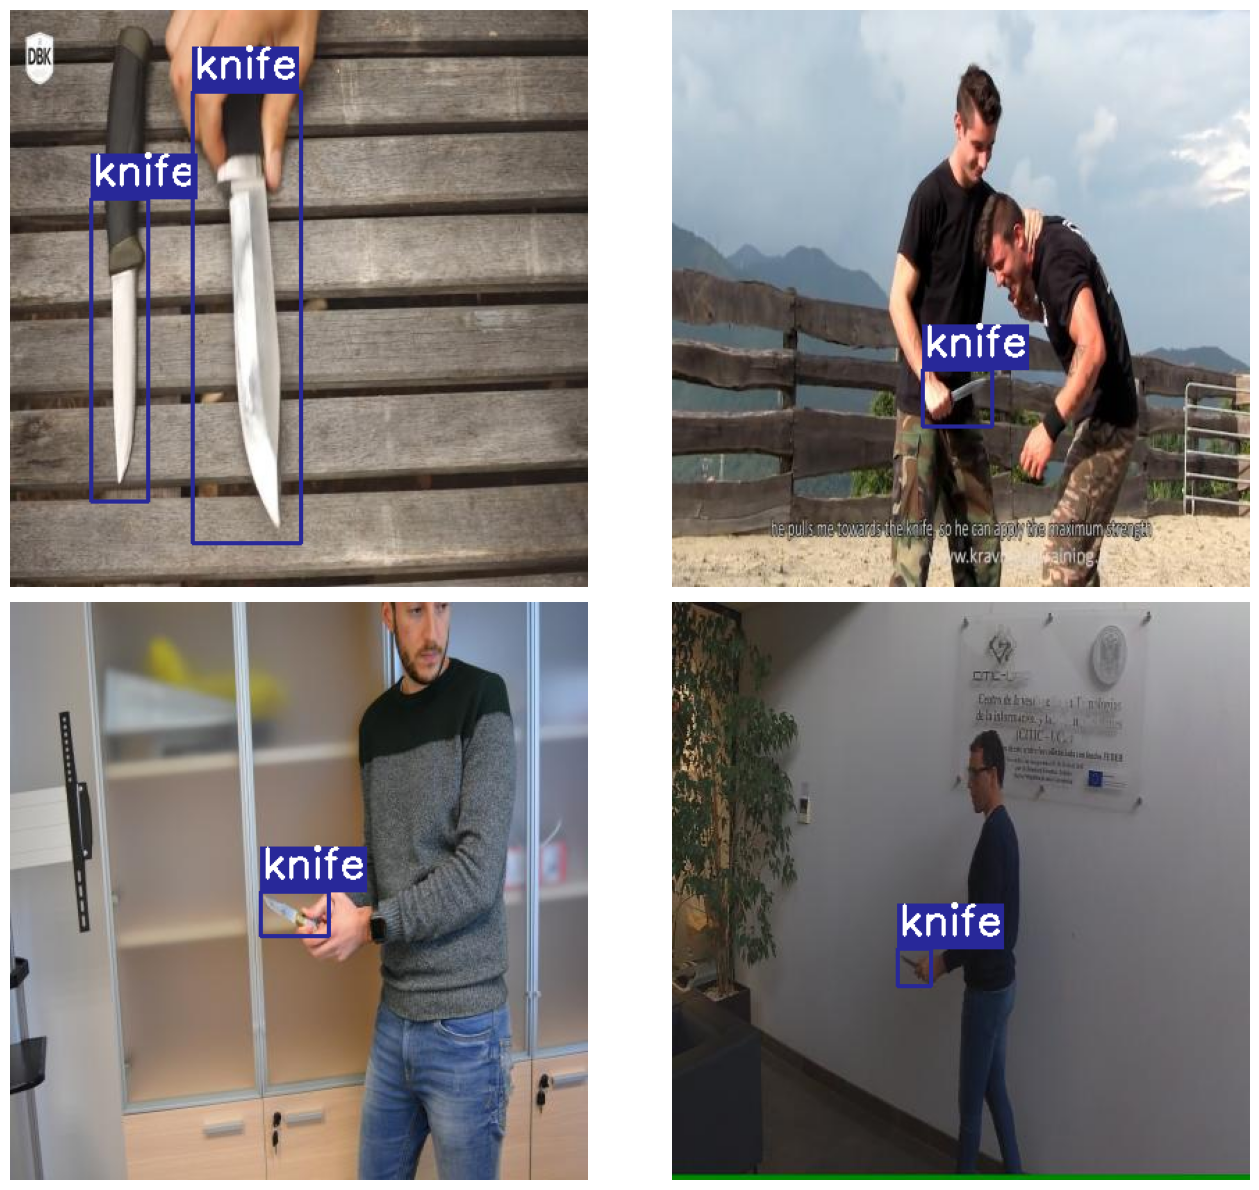

In [53]:
# Visualize a few training images.
plot(
    image_paths=r'C:\Users\Vinay Kumar Talreja\Desktop\FYP YOLO\train/images/*', 
    label_paths=r'C:\Users\Vinay Kumar Talreja\Desktop\FYP YOLO\train/labels/*',
    num_samples=4,
)

# Helper Functions

In [54]:
def set_res_dir():
    # Directory to store results
    res_dir_count = len(glob.glob('runs/train/*'))
    print(f"Current number of result directories: {res_dir_count}")
    if TRAIN:
        RES_DIR = f"results_{res_dir_count+1}"
        print(RES_DIR)
    else:
        RES_DIR = f"results_{res_dir_count}"
    return RES_DIR

In [66]:
def monitor_tensorboard():
    %load_ext tensorboard
    %tensorboard --logdir runs/train

In [61]:
# %reload_ext tensorboard

# Clone Yolov5s

In [56]:
# if not os.path.exists('yolov5'):
#     !git clone https://github.com/ultralytics/yolov5.git

In [57]:
%cd yolov5/
!pwd

C:\Users\Vinay Kumar Talreja\Desktop\FYP YOLO\yolov5


'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [58]:
!pip install -r requirements.txt

Unable to create process using 'C:\Users\Vinay Kumar Talreja\anaconda3\python.exe "C:\Users\Vinay Kumar Talreja\anaconda3\Scripts\pip-script.py" install -r requirements.txt'


# Small

In [67]:
monitor_tensorboard()

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 6200), started 2 days, 19:10:57 ago. (Use '!kill 6200' to kill it.)

# Training

In [33]:
RES_DIR = set_res_dir()
# if TRAIN:
    #!python train.py --data ../data.yaml --weights yolov5s.pt \
    #--img 640 --epochs {EPOCHS} --batch-size 16 --name {RES_DIR}

Current number of result directories: 1
results_2


In [3]:
%cd yolov5/ 

C:\Users\Vinay Kumar Talreja\Desktop\FYP YOLO\yolov5


# Testing

In [ ]:
# Helper function for inference on images.
def inference(RES_DIR, data_path):
    # Directory to store inference results.
    infer_dir_count = len(glob.glob('runs/detect/*'))
    print(f"Current number of inference detection directories: {infer_dir_count}")
    INFER_DIR = f"inference_{infer_dir_count+1}"
    print(INFER_DIR)
    # Inference on images.
    !python detect.py --weights runs/train/{RES_DIR}/weights/best.pt \
    --source {data_path} --name {INFER_DIR}
    return INFER_DIR

In [ ]:
def visualize(INFER_DIR):
# Visualize inference images.
    INFER_PATH = f"runs/detect/{INFER_DIR}"
    infer_images = glob.glob(f"{INFER_PATH}/*.jpg")
    print(infer_images)
    for pred_image in infer_images:
        image = cv2.imread(pred_image)
        plt.figure(figsize=(19, 16))
        plt.imshow(image[:, :, ::-1])
        plt.axis('off')
        plt.show()

In [ ]:
# Inference on images.
# IMAGE_INFER_DIR = inference(RES_DIR, 'inference_images')

In [2]:
def livefun():
    !python detect.py --weights runs/train/results_1/weights/best.pt --source 0


In [4]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/liveCheck', methods=['POST'])
def liveCheck():
    print("live check")
#     livefun()
    
    result = {"success":1}
    
    return jsonify({'prediction': "yes",'success':True})


if __name__ == '__main__':
    # Run the Flask application
    app.run(host='0.0.0.0', port=5000)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on all addresses.
 * Running on http://192.168.18.17:5000/ (Press CTRL+C to quit)
192.168.18.17 - - [17/May/2023 21:29:25] "POST /imgcheck HTTP/1.1" 404 -
192.168.18.17 - - [17/May/2023 21:30:41] "POST /imgcheck HTTP/1.1" 404 -
